In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#reading the dataset
titanic_df = pd.read_csv(r"C:\Users\HP\Videos\Data Science\Example Projects\train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#getting the info of the dataset

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.show()

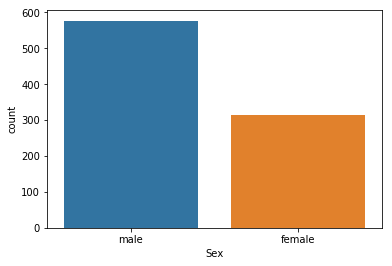

In [6]:
#who were the passengers on the titanics
#plotting the male versus the female


sns.countplot(x ='Sex', data = titanic_df)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


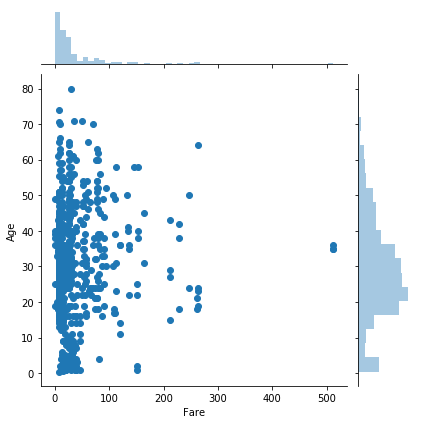

In [7]:
sns.jointplot(x='Fare', y= 'Age', data = titanic_df)

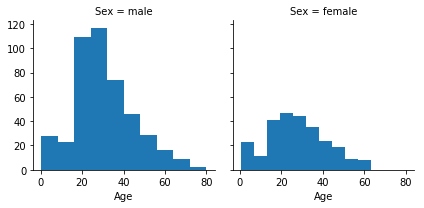

In [8]:
grid =  sns.FacetGrid(titanic_df, col = 'Sex')

grid.map(plt.hist, 'Age')

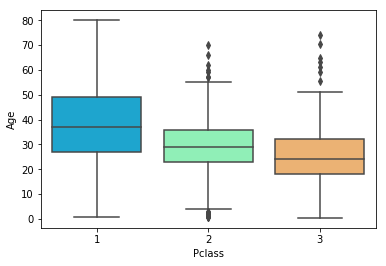

In [9]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette='rainbow')

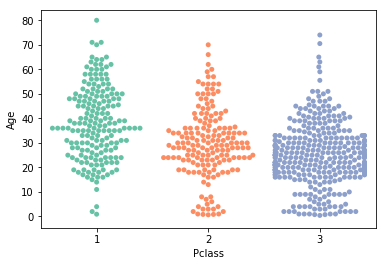

In [10]:
sns.swarmplot(x='Pclass',y='Age', data = titanic_df,palette='Set2')

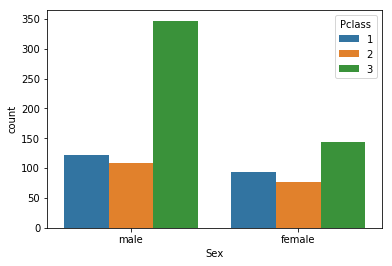

In [11]:
sns.countplot(x='Sex',data=titanic_df,hue='Pclass')

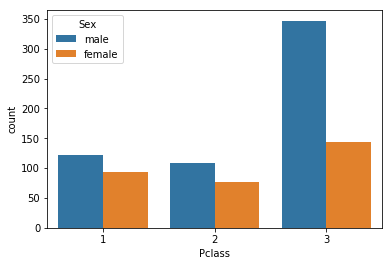

In [12]:
sns.countplot(x='Pclass',data=titanic_df,hue='Sex')

In [13]:
#The plot above is showing that the number of female and male are almost the same for class 1 and class 2
#while the male dominate in class2

In [14]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex 
    

In [15]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child,axis = 1)

In [16]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


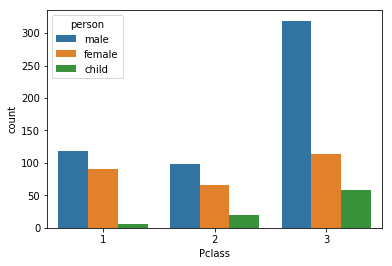

In [17]:
sns.countplot(x='Pclass',data=titanic_df,hue='person')

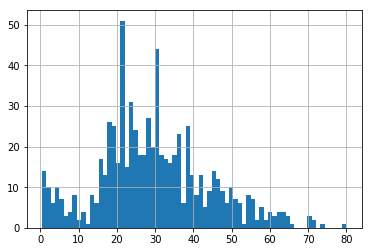

In [18]:
titanic_df['Age'].hist(bins=70)

In [19]:
titanic_df['Age'].mean()

29.69911764705882

In [20]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

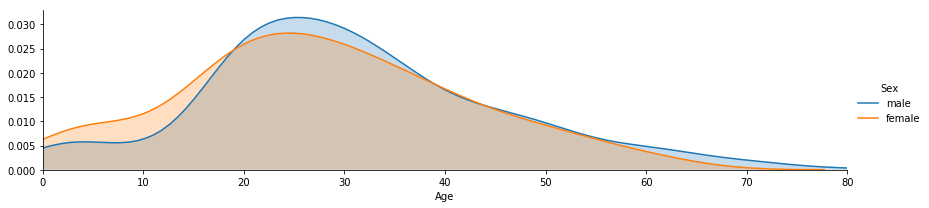

In [21]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

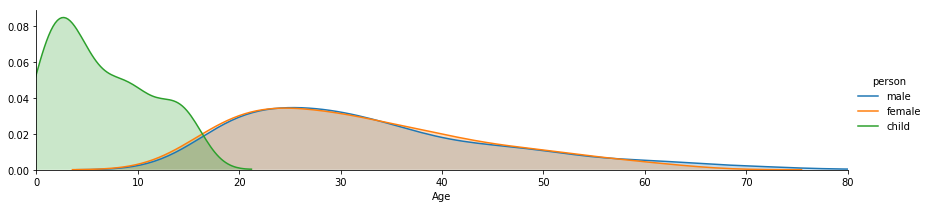

In [22]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

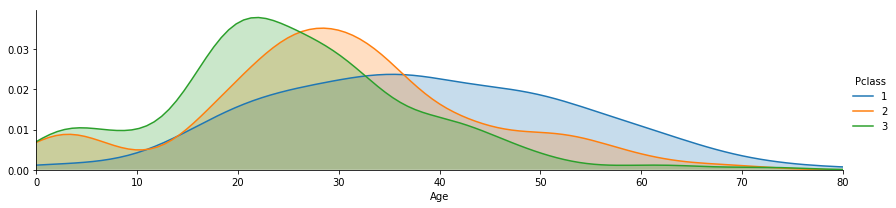

In [23]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [25]:
#dropping all the non values in the cabin column


deck = titanic_df['Cabin'].dropna()

In [26]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

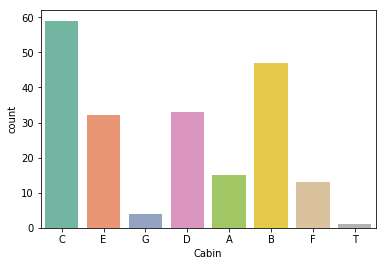

In [27]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(x='Cabin',data=cabin_df,palette='Set2')

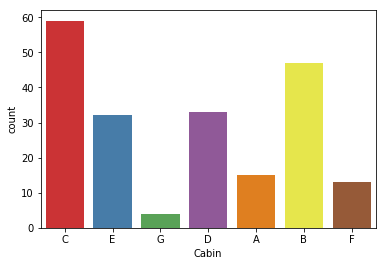

In [28]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.countplot(x='Cabin',data=cabin_df,palette='Set1')

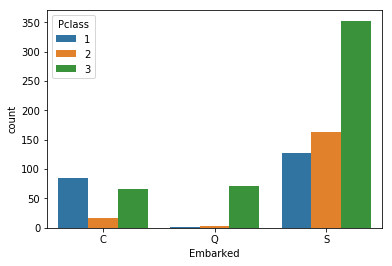

In [29]:
sns.countplot(x='Embarked', data=titanic_df,hue='Pclass',order=['C','Q','S'])

In [30]:
#who was alone and who was with family

In [31]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [32]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [33]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,1


In [34]:
def Alone_with_family(passenger):
    alone = passenger
    
    if alone > 0:
        return 'with family'
    else:
        return 'alone'
    

In [35]:
titanic_df['Alone'] = titanic_df['Alone'].apply(Alone_with_family)

In [36]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,with family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,with family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,with family


In [37]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


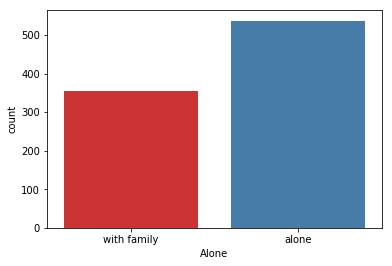

In [38]:
sns.countplot(x='Alone',data=titanic_df,palette='Set1')

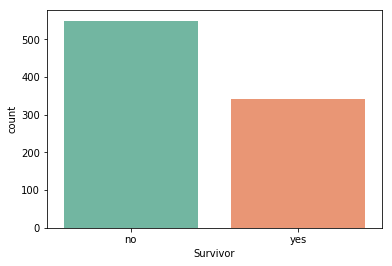

In [39]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})


sns.countplot('Survivor',data=titanic_df,palette='Set2')

In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


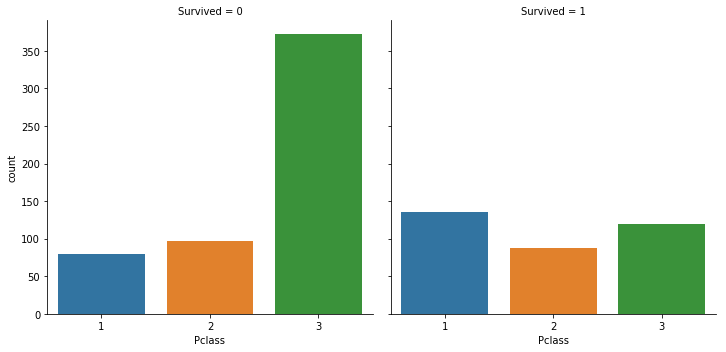

In [41]:
#defining what made people on the titanic survived

sns.catplot(x='Pclass',data=titanic_df,col='Survived',kind='count')

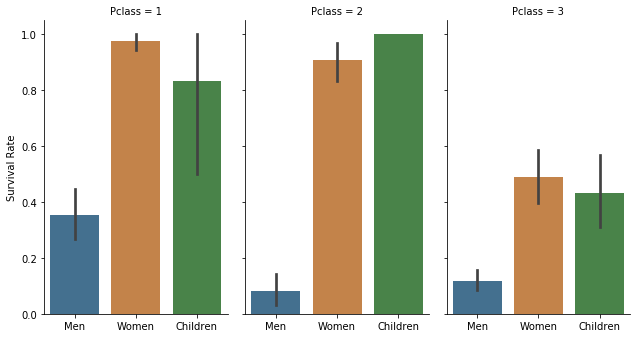

In [42]:
a = sns.catplot(x='person',y='Survived',col='Pclass',
               data=titanic_df,saturation=.5,
               kind='bar',aspect=.6)

a.set_axis_labels('','Survival Rate')
a.set_xticklabels(['Men','Women','Children'])

In [43]:
a.set_axis_labels('','Survival Rate')
a.set_xticklabels(['Men','Women','Children'])

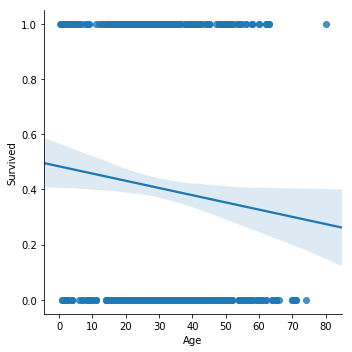

In [44]:
a = sns.lmplot(x='Age',y='Survived',data=titanic_df)

In [45]:
#The plot above shows that the older a was passenger the less likly they survived

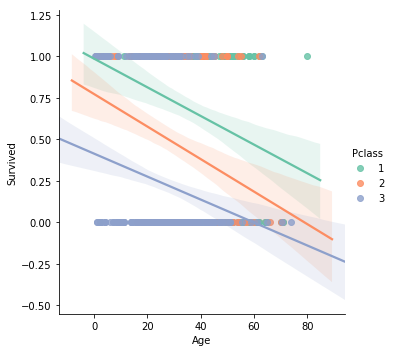

In [46]:
a = sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='Set2')


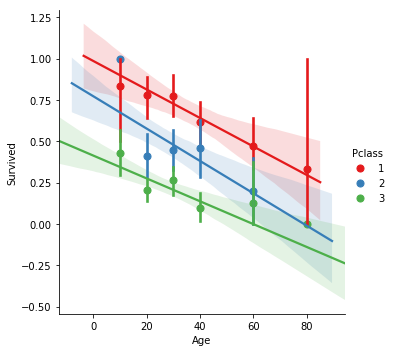

In [47]:
Age_grp = [10,20,30,40,60,80]

sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='Set1',
           x_bins=Age_grp)

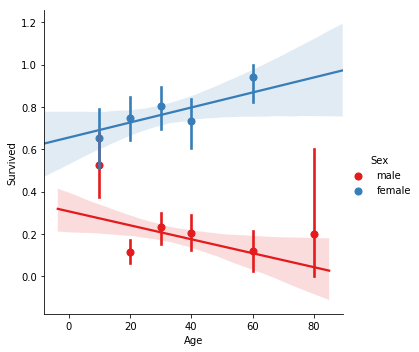

In [48]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='Set1',
          x_bins=Age_grp)

In [49]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,alone,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,alone,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,with family,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,with family,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,with family,yes


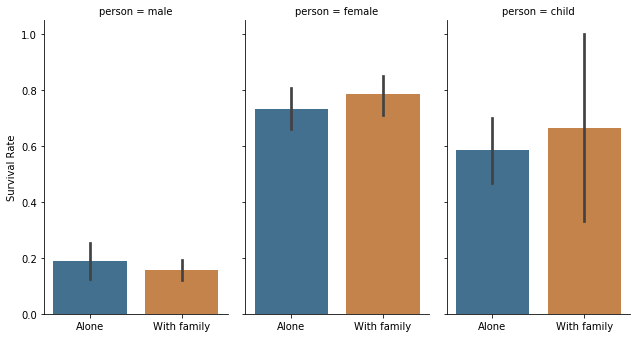

In [50]:
a = sns.catplot(x='Alone',y='Survived',col='person',
               data=titanic_df,saturation=.5,
               kind='bar',aspect=.6)

a.set_axis_labels('','Survival Rate')
a.set_xticklabels(['Alone','With family'])

In [51]:
list1 = ['C123']

In [52]:
list1.pop(-1)

'C123'

In [53]:
#creating a new cabin column with only the cabin first letter

deck = titanic_df['Cabin'].dropna()

levels = []

for level in deck:
    levels.append(level[0])
    
titanic_df['Cabin'] = DataFrame(levels)

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,E,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,G,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,male,alone,no


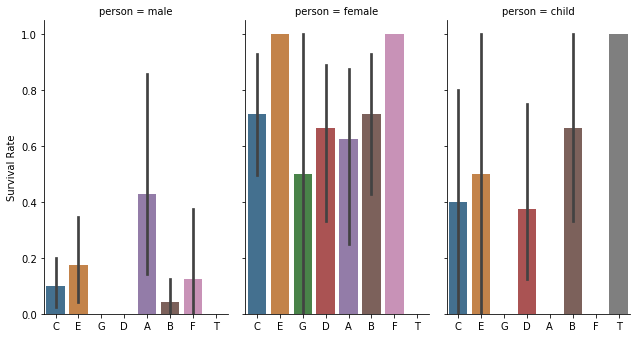

In [55]:
a = sns.catplot(x='Cabin',y='Survived',col='person',
               data=titanic_df,saturation=.5,
               kind='bar',aspect=.6)

a.set_axis_labels('','Survival Rate')

In [56]:
print('he')

he
